In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris() # 鸢尾花数据集
X    = iris.data[:,2:]  # 取出数据集的后面两个列作为两个维度
y    = iris.target


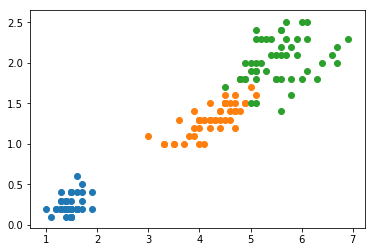

In [19]:
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.scatter(X[y == 2,0], X[y == 2,1])
plt.show()

In [121]:
# 构建决策树分类器
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy') # 通过信息熵的
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
#利用信息熵来做决策树边界
def plot_decision_boundary(model,axis):
     x0,x1 = np.meshgrid(
         np.linspace(axis[0],axis[1], int((axis[1] - axis[0])*100 )).reshape(-1,1),
         np.linspace(axis[2],axis[3], int((axis[3] - axis[2])*100 )).reshape(-1,1)
     )
     X_new = np.c_[x0.ravel(),x1.ravel()]
     y_predict  = model.predict(X_new)
     zz         = y_predict.reshape(x0.shape)
     from matplotlib.colors import ListedColormap 
     custom_cmap = ListedColormap (['#EF9A00','#FFF89D', '#90CAF9'])
     plt.contourf(x0,x1,zz,cmap = custom_cmap )
     plt.colorbar(orientation = 'horizontal')  # 增加水平colorbar 
     plt.colorbar(orientation = 'vertical' )   # 增加垂直colorbar
     

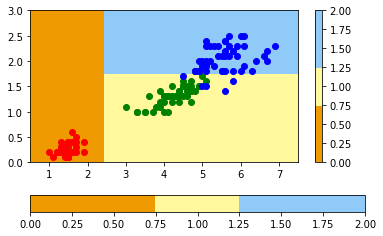

In [102]:
plot_decision_boundary(dt_clf, axis  = [0.5, 7.5, 0, 3])
plt.scatter(X[y == 0,0], X[y == 0,1], color  = 'r')
plt.scatter(X[y == 1,0], X[y == 1,1], color  = 'g')
plt.scatter(X[y == 2,0], X[y == 2,1], color  = 'b')
plt.show()

# 模拟使用信息熵划分

In [122]:
def split(x, y, d,value) : # x is put , y the classifier output, d is dimensions, value is the split value of this dim
    index_a =  (X[:,d]<= value)  #输入样本在维度d上小于等于value 的值  
    index_b =  (X[:,d]> value)  # 大于value的索引
    return X[index_a], X[index_b], y[index_a], y[index_b]


In [153]:
from collections import Counter
from math import log 
def entropy(y):
    counter  = Counter(y)
    res = 0.0
    for num in  counter.values():
        p =  num/ len(y)
        res +=  -p*np.log(p)
    return res 
     
#------------------------------
#  在数据集上寻找d 维度和value 值
def try_split(X,y):
    best_entropy = float('inf')
    best_b,best_v = -1,-1
    # shape[0] 表示多少上。shape[1]表示多少列
    for d in range(X.shape[1]):
         sorted_index  = np.argsort(X[:,d]) # d 维度上数组排序的索引值
         for i in range(1,len(X)):
           if (X[sorted_index[i-1],d] !=  X[sorted_index[i],d] ):
               v = (X[sorted_index[i-1], d] + X[sorted_index[i], 1]) / 2
               X_l,X_r,y_l,y_r  = split(X,y,d,v)
               e =  entropy(y_l)  + entropy(y_r)  # 在这个结点这个维度值上划分结点信息熵
               if e < best_entropy: 
                  best_entropy, best_d,best_v = e,d,v
    return best_entropy,best_d,best_v
                  

In [154]:
# 调用try_split  函数
best_entropy, best_d,best_v = try_split(X,y)
print("best_entropy = ",best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.0


In [155]:
# 尝试将划分的结果存在X1_l, X1_r 
# 将上述划分得到的best_d,best_v
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [144]:
entropy(y1_l)

0.0

In [147]:
entropy(y1_r)

0.6931471805599453

In [159]:
 X2_l,X2_r,y2_l,y2_r = split(X, y, best_d,best_v)

In [161]:
def sigmoid(t):
    return 1/ (1 + np.exp(-t))

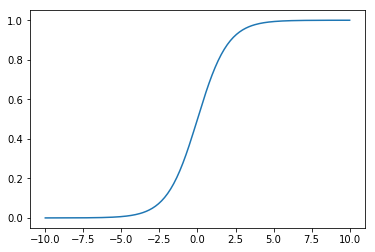

In [194]:
a = np.linspace(-10,10,200)
plt.plot(a, sigmoid(a))
plt.show()

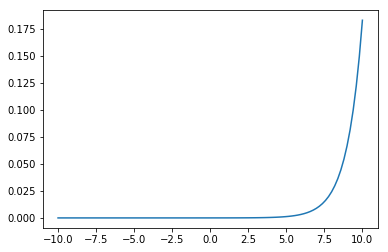

In [205]:
## Define the function: Softmax function
import math
def softmax(z):
    z_1       = [np.exp(i) for i in z]
    z_1_sum   = sum(z_1)
    z_softmax = [i/z_1_sum for i in z_1]
    plt.plot(z,z_softmax)
    plt.show()

    
z         = np.linspace(-10,10,100)
softmax(z)

In [180]:
x = np.linspace(2,3,num = 5)

In [183]:
y = sigmoid(x)

In [184]:
print('x = ', x)

x =  [2.   2.25 2.5  2.75 3.  ]


In [185]:
print('y = ', y)

y =  [0.88079708 0.90465054 0.92414182 0.93991335 0.95257413]


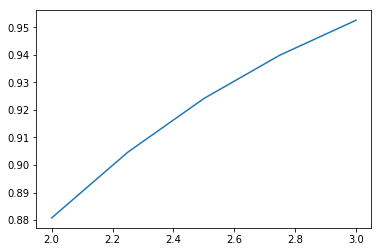

In [187]:
plt.plot(x,y)